<H2 align="center">75.06/95.58 Organización de Datos</H2>
<H2 align="center">Primer Cuatrimestre de 2019</H2>
<H2 align="center">Trabajo Práctico 1: Enunciado</H2>

<br>

Para esta primera entrega del TP, realizaremos el análisis exploratorio del set de datos provisto por la empresa Jampp. 

Los datos a analizar estan disponibles en https://drive.google.com/drive/folders/1-7ACCWhS3sWVh0vU273YwbS74WmzEhLa?usp=sharing

En el directorio podemos encontrar:
<ul>
<li>installs</li> 
<li>clicks</li> 
<li>events</li>
<li>auctions</li>
</ul>
 
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:
<ul>
- El análisis debe estar hecho en Python Pandas o R.
</ul>
<ul>
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
</ul>
<ul>
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
</ul>
<ul>
- Agregar en Kaggle un kernel con el análisis exploratorio realizado (deseable pero no mandatorio)
</ul>

La evaluación del TP se realizará en base al siguiente criterio:

<ul>
- Originalidad del análisis exploratorio. 
</ul>
<ul>
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
</ul>
<ul>
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
</ul>
<ul>
- Calidad de las visualizaciones presentadas.
</ul>
<ul>
<ul>    
-  ¿Tienen todos los ejes su rótulo?
</ul>    
</ul>
<ul>
<ul> 
-  ¿Tiene cada visualización un título?
</ul>
</ul>
<ul>
<ul> 
-  ¿Es entendible la visualización sin tener que leer la explicación?
</ul>
</ul>
<ul>
<ul> 
-  ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
</ul>
</ul>
<ul>
<ul> 
-  ¿Es una visualización interesante?
</ul>
</ul>
<ul>
<ul> 
-  ¿El uso del color es adecuado?
</ul>
</ul>
<ul>
<ul>     
-  ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
</ul>
</ul>
<ul>
<ul> 
-  ¿La visualización es consistente con los datos?
</ul>
</ul>
<ul>
- Conclusiones presentadas.
</ul>
<ul>
<ul>
-  ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
</ul>
</ul>
<ul>
<ul>
-  ¿Identificaron patrones o funnels de usuarios?
</ul>
</ul>
<ul>
<ul>
-  ¿El análisis realiza un aporte a Jampp?
</ul>
</ul>

El grupo que realice el mejor análisis exploratorio obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el parcial además de ser publicado en el repositorio de la materia como ejemplo para los siguientes cuatrimestres.

Como dato a tener en cuenta, para el TP2 se trabajará con estos mismos datos intentando determinar:
<ul>
<ul>
-  En un instante dado, estimar 𝑆𝑡(𝑑) el tiempo hasta que un dispositivo 𝑑 aparezca de vuelta en una subasta RTB
</ul>
</ul>

<ul>
<ul>
-  En un instante dado, estimar 𝑆𝑐(𝑑) el tiempo hasta que un dispositivo 𝑑 convierta
</ul>
</ul>


La idea del TP1 es obtener información que facilite luego plantear una solución para el TP2.

<b>Glosario</b>
<ul>
<ul>
- Convertir: el objetivo de mostrar publicidad es que un dispositivo instale una aplicación, a ese evento se le llama conversión.
</ul>
</ul>
<ul>
<ul>
- Dispositivo: entidad con un id de publicidad asociado. Por ejemplo: un celular Samsung J6 con Android tiene un id único, un Apple iPhone tiene un identificador único.
</ul>
</ul>
<ul>
<ul>
- Evento: cualquier tipo de acción categorizada dentro de una aplicación. Por ejemplo, en una aplicación de e-commerce un funnel de eventos muy común puede ser del estilo “abrir_app” → “buscar_producto” → “revisar_catalogo” → “agregar_a_carrito” → “efectuar_compra”. Cada uno de estos pasos es un evento.
</ul>
</ul>
<ul>
<ul>
- Subasta: en el momento que una aplicación quiere mostrar una publicidad, ese espacio se vende en una subasta (generalmente de segundo precio) donde todos los interesados en mostrar una publicidad ofertan un precio y gana quién más ofrece.
</ul>
</ul>
<br><br><br>

In [4]:
##-----------------------------------------------------------------------------------##
## Importacion general de librerias y de visualizacion (matplotlib y seaborn)        ##
##-----------------------------------------------------------------------------------##

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##-----------------------------------------------------------------------------------##
##       Cargamos los archivos que nos proveen para analizar                         ##
##-----------------------------------------------------------------------------------##

df_clicks= pd.read_csv('clicks.csv'); 
df_events= pd.read_csv('events.csv',low_memory=False); 
df_installs= pd.read_csv('installs.csv'); 
df_auctions= pd.read_csv('auctions.csv'); 

In [12]:
##-----------------------------------------------------------------------------------##
##  Vemos la cantidad de registros y columnas que tiene cada dataset                 ##
##-----------------------------------------------------------------------------------##
df_clicks.shape

(26351, 20)

In [13]:
df_events.shape

(2494423, 22)

In [14]:
df_installs.shape

(3412, 18)

In [15]:
df_auctions.shape

(19571319, 7)

In [16]:
##-----------------------------------------------------------------------------------##
## Visualizamos los primeros registros del archivo Clicks.csv y los campos           ##
## contabilizamos los valores que tiene cada uno                                     ##
##-----------------------------------------------------------------------------------##

df_clicks.head(3)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647


In [17]:
df_clicks.count()

advertiser_id      26351
action_id              0
source_id          26351
created            26351
country_code       26351
latitude           26351
longitude          26351
wifi_connection    26351
carrier_id         26340
trans_id           26351
os_minor           26339
agent_device        3243
os_major           26339
specs_brand        26351
brand               6235
timeToClick        22977
touchX             23011
touchY             23011
ref_type           26351
ref_hash           26351
dtype: int64

In [18]:
##-----------------------------------------------------------------------------------##
## Observamos que action_id, country_code y wifi_connection no nos aportan           ##
## información relevante, ya que el primero tiene todos los campos nulos, el segundo ##
## nos indica que todos los clicks se hicieron en un solo país y el tercero          ##
## que fueron sin conexión a wifi, ya que es todo el campo False                     ##
##-----------------------------------------------------------------------------------##
df_clicks.action_id.isnull().value_counts()


True    26351
Name: action_id, dtype: int64

In [19]:
df_clicks.country_code.value_counts()


6333597102633388268    26351
Name: country_code, dtype: int64

In [20]:
df_clicks.wifi_connection.value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [21]:
##-----------------------------------------------------------------------------------##
## Observamos que hay varios registros con valores nulos en el campo "timeToClick",  ##
## los cuales podrían ser errores de la aplicación y, por lo tanto, no los           ##
## tendremos en cuenta para el análisis considerándolos 0                            ##
##-----------------------------------------------------------------------------------##
print(df_clicks.timeToClick.isnull().sum())


3374


In [22]:
##-----------------------------------------------------------------------------------##
## Convertimos el campo timeToClick de float a datetime                              ##
##-----------------------------------------------------------------------------------##
df_clicks.timeToClick = df_clicks.timeToClick.replace(np.NaN,0)
df_clicks.timeToClick = df_clicks.timeToClick.astype('timedelta64[s]')

print(df_clicks.timeToClick)

0       00:00:01
1       00:00:00
2       00:00:00
3       00:00:19
4       00:00:28
5       00:00:00
6       00:00:00
7       00:00:00
8       00:00:03
9       00:00:01
10      00:00:00
11      00:00:00
12      00:00:11
13      00:00:01
14      00:01:24
15      00:54:47
16      00:10:54
17      00:00:00
18      00:11:17
19      00:00:00
20      00:00:01
21      00:00:01
22      00:00:00
23      00:00:04
24      00:00:00
25      00:00:01
26      00:00:17
27      00:03:00
28      00:00:28
29      00:00:36
          ...   
26321   00:00:03
26322   00:00:05
26323   00:01:11
26324   00:00:01
26325   00:00:26
26326   00:02:15
26327   00:01:59
26328   00:00:16
26329   00:00:04
26330   00:00:00
26331   00:00:00
26332   00:00:07
26333   00:00:05
26334   00:00:10
26335   00:00:00
26336   00:00:01
26337   00:00:57
26338   00:00:02
26339   00:00:00
26340   00:00:00
26341   00:00:03
26342   00:00:00
26343   00:00:21
26344   00:02:25
26345   00:00:04
26346   00:00:00
26347   00:00:00
26348   00:00:

In [23]:
#Convertimos el campo de fecha de creación del click en tipo datetime.
df_clicks.created = pd.to_datetime(df_clicks.created)

                        dia  cantidad
7 2019-03-05 00:00:00+00:00        31
8 2019-03-06 00:00:00+00:00        14
5 2019-03-07 00:00:00+00:00      2989
6 2019-03-08 00:00:00+00:00      2839
4 2019-03-09 00:00:00+00:00      3283
2 2019-03-10 00:00:00+00:00      3966
1 2019-03-11 00:00:00+00:00      4557
0 2019-03-12 00:00:00+00:00      5204
3 2019-03-13 00:00:00+00:00      3468


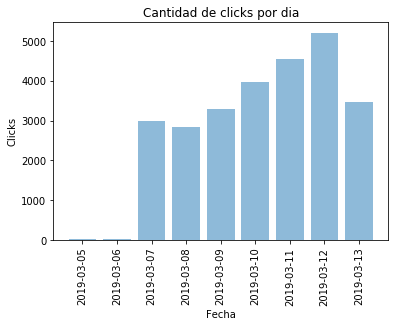

In [24]:
#Obtenemos la cantidad de clicks que se realizaron por día.
df_clicks_por_dia = df_clicks.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_clicks_por_dia)

plt.bar(np.arange(len(df_clicks_por_dia)), df_clicks_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_clicks_por_dia)), df_clicks_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Clicks')
plt.xlabel('Fecha')
plt.title('Cantidad de clicks por dia')
 
plt.show()

In [25]:
#Analizamos la información del archivo Events.csv
df_events.head(3)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17


6333597102633388268    2494423
Name: device_countrycode, dtype: int64
True     930902
False    447970
Name: wifi, dtype: int64


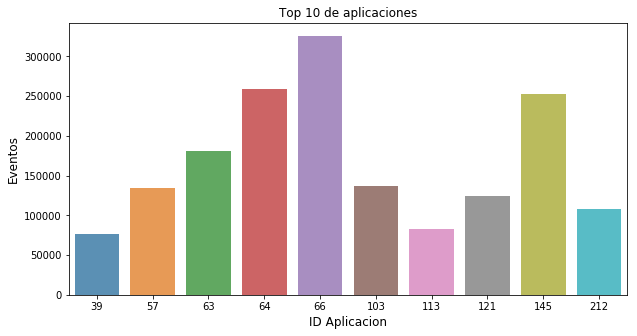

In [26]:
#Los eventos se realizaron en el mismo país y más de la mitad de 
#los mismos ocurrieron en dispositivos que estaban conectados a una red WiFi.

print(df_events.device_countrycode.value_counts())
print(df_events.wifi.value_counts())

#Obtenemos el top 10 de aplicaciones en las cuales se realizaron más eventos.
app_for_events = df_events.application_id.value_counts(sort=True)

app_for_events = app_for_events[:10,]
plt.figure(figsize=(10,5))
sns.barplot(app_for_events.index, app_for_events.values, alpha=0.8)
plt.title('Top 10 de aplicaciones')
plt.ylabel('Eventos', fontsize=12)
plt.xlabel('ID Aplicacion', fontsize=12)
plt.show()

         dia  cantidad
8 2019-03-05    240549
7 2019-03-06    253505
6 2019-03-07    253706
4 2019-03-08    285535
3 2019-03-09    286221
2 2019-03-10    293091
5 2019-03-11    268884
1 2019-03-12    296665
0 2019-03-13    316267


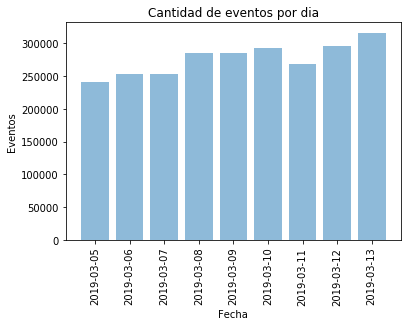

In [27]:
#Convertimos la fecha de creación del evento a un tipo datetime.
df_events.date = pd.to_datetime(df_events.date)

#Obtenemos la cantidad de eventos por día.
df_eventos_por_dia = df_events.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_eventos_por_dia)

plt.bar(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Eventos')
plt.xlabel('Fecha')
plt.title('Cantidad de eventos por dia')
 
plt.show()

In [28]:
#Analizamos la información del archivo Installs.csv

df_installs.head(3)

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18


6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64
True     1377
False     352
Name: wifi, dtype: int64
False    3412
Name: attributed, dtype: int64


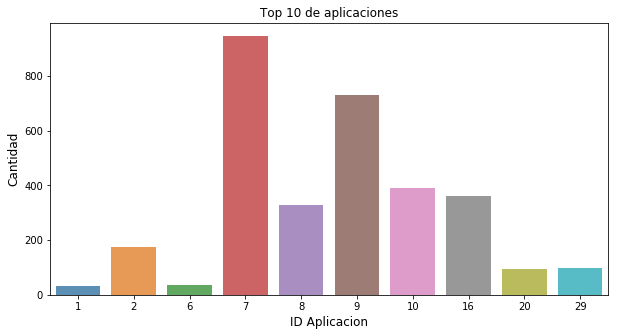

In [29]:
#Las instalaciones se realizaron en dos países y más de la mitad de 
#los mismos ocurrieron en dispositivos que estaban conectados a una red WiFi.

print(df_installs.device_countrycode.value_counts())
print(df_installs.wifi.value_counts())

#ninguna instalación es atribuida a Jampp.
print(df_installs.attributed.value_counts())

#Obtenemos el top 10 de aplicaciones en las cuales se realizaron más instalaciones.
app_count  = df_installs['application_id'].value_counts(sort=True)
app_count = app_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(app_count.index, app_count.values, alpha=0.8)
plt.title('Top 10 de aplicaciones')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID Aplicacion', fontsize=12)
plt.show()

         dia  cantidad
7 2019-03-05       337
8 2019-03-06       325
2 2019-03-07       393
5 2019-03-08       366
4 2019-03-09       368
6 2019-03-10       351
3 2019-03-11       377
0 2019-03-12       472
1 2019-03-13       423


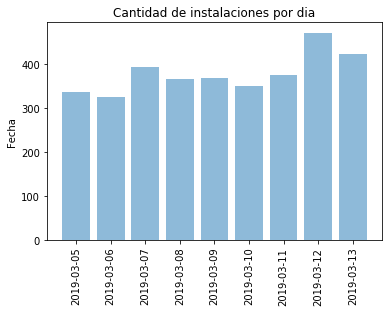

    hora  cantidad
8      1       191
11     2       174
16     3       115
17     4        76
19     5        38
23     6        18
22     7        21
20     8        28
21     9        27
18    10        63
15    11       116
14    12       130
13    13       169
5     14       201
2     15       220
10    16       186
0     17       233
12    18       170
4     19       211
9     20       188
6     21       198
1     22       229
3     23       212
7     24       198


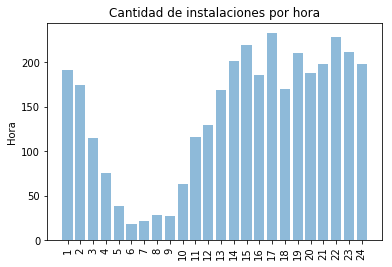

In [30]:
#Convertimos el campo created a datetime.

df_installs.created = pd.to_datetime(df_installs.created)

#Obtenemos las instalaciones por dia y hora.

df_installs_por_dia = df_installs.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_installs_por_dia)

plt.bar(np.arange(len(df_installs_por_dia)), df_installs_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_dia)), df_installs_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Instalaciones')
plt.ylabel('Fecha')
plt.title('Cantidad de instalaciones por dia')
 
plt.show()

#Generamos una columna con la hora de la instalación
df_installs['hour'] = df_installs.created.dt.hour
df_installs['hour'] = df_installs['hour'].replace(0,24)

df_installs_por_hora = df_installs.hour\
       .value_counts()\
       .rename_axis('hora')\
       .reset_index(name='cantidad')\
       .sort_values(by='hora', ascending=True)

print(df_installs_por_hora)

plt.bar(np.arange(len(df_installs_por_hora)), df_installs_por_hora.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_hora)), df_installs_por_hora.hora,rotation=90)
plt.ylabel('Instalaciones')
plt.ylabel('Hora')
plt.title('Cantidad de instalaciones por hora')
 
plt.show()

In [31]:
#Analizamos el archivo de auctions.csv
df_auctions.head(3)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0


6333597102633388268    19571319
Name: country, dtype: int64
         dia  cantidad
7 2019-03-05   1182401
8 2019-03-06   1032970
6 2019-03-07   2047661
4 2019-03-08   2303002
5 2019-03-09   2074552
2 2019-03-10   2637534
3 2019-03-11   2574916
1 2019-03-12   2779910
0 2019-03-13   2938373


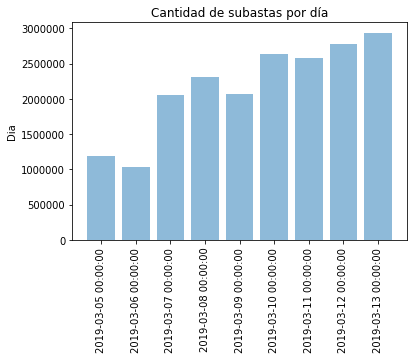

In [32]:
#Las subastas se realizaron en el mismo país.
print(df_auctions.country.value_counts())

#Convertimos el campo date a datetime.
df_auctions.date = pd.to_datetime(df_auctions.date)
df_auctions_por_dia = df_auctions.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_auctions_por_dia)
plt.bar(np.arange(len(df_auctions_por_dia)), df_auctions_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_auctions_por_dia)), df_auctions_por_dia.dia,rotation=90)
plt.ylabel('Subastas')
plt.ylabel('Dia')
plt.title('Cantidad de subastas por día')
 
plt.show()

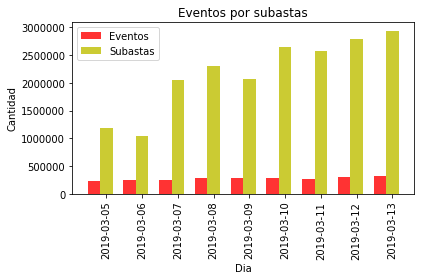

In [34]:
#Comparación de subastas y eventos por día.

n_groups = 9
eventos = df_eventos_por_dia.cantidad
subastas = df_auctions_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, eventos, bar_width,
alpha=opacity,
color='r',
label='Eventos')
    
rects2 = plt.bar(index + bar_width, subastas, bar_width,
alpha=opacity,
color='y',
label='Subastas')

    
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Eventos por subastas')
plt.xticks(index + bar_width, df_eventos_por_dia.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

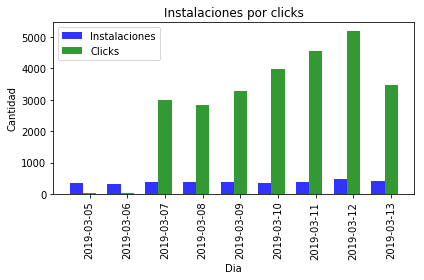

In [35]:
n_groups = 9
clicks = df_clicks_por_dia.cantidad
instalaciones = df_installs_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Instalaciones por clicks')
plt.xticks(index + bar_width, df_installs_por_dia.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


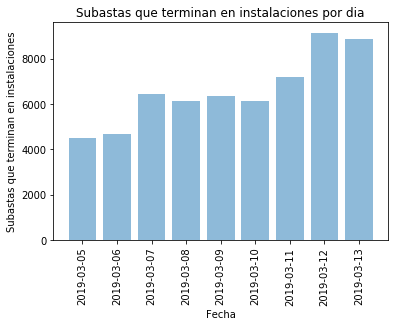

c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


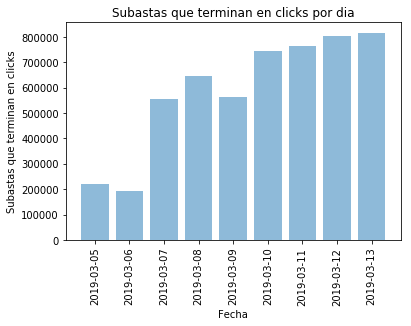

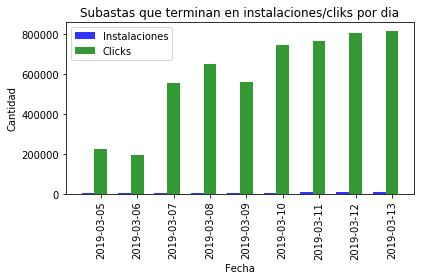

In [36]:
# ¿Cuántas subastas terminan en instalaciones y cuàntas en solamente clicks?

auctions_to_installs= df_auctions[df_auctions.device_id.isin(df_installs["ref_hash"])]
auctions_to_installs['datePart'] = auctions_to_installs.date.dt.floor('d')
auctions_to_installs_per_day = auctions_to_installs.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

plt.bar(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en instalaciones')
plt.xlabel('Fecha')
plt.title('Subastas que terminan en instalaciones por dia')
 
plt.show()

auctions_to_clicks = df_auctions[df_auctions.device_id.isin(df_clicks["ref_hash"])]
auctions_to_clicks['datePart'] = auctions_to_clicks.date.dt.floor('d')
auctions_to_clicks_per_day = auctions_to_clicks.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

plt.bar(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en clicks')
plt.xlabel('Fecha')
plt.title('Subastas que terminan en clicks por dia')
 
plt.show()

n_groups = 9
clicks = auctions_to_clicks_per_day.cantidad
instalaciones = auctions_to_installs_per_day.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Subastas que terminan en instalaciones/cliks por dia')
plt.xticks(index + bar_width, auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

#Por lo que podemos observar, el 27,1% de las subastas realizadas terminan en clicks pero sólo el 0.3% de las mismas
# terminan en instalaciones.


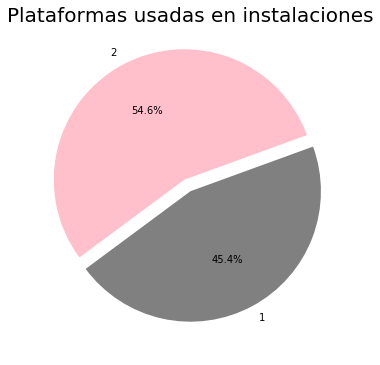

In [37]:
#preguntar si 1 seria ios o android.
sizes = auctions_to_installs.platform.value_counts()
nombres = ['2', '1']

plt.figure(figsize=(6, 6))
plt.title('Plataformas usadas en instalaciones', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'grey'], explode=(0.1, 0))
plt.show()

   cliente  cantidad
1        0        70
4        1         2
2        2        12
0        3     26263
6        5         1
3        7         2
5        8         1


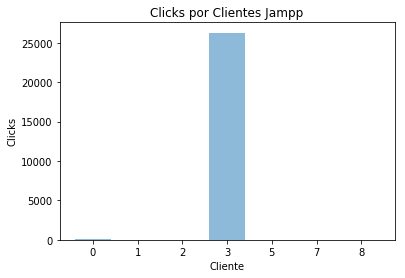

In [38]:
#Clicks por clientes

clicks_by_client = df_clicks.advertiser_id.value_counts().rename_axis('cliente')\
       .reset_index(name='cantidad')\
       .sort_values(by="cliente", ascending=True)

print(clicks_by_client)

plt.bar(np.arange(len(clicks_by_client)), clicks_by_client.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(clicks_by_client)), clicks_by_client.cliente)
plt.ylabel('Clicks')
plt.xlabel('Cliente')
plt.title('Clicks por Clientes Jampp')
 
plt.show()

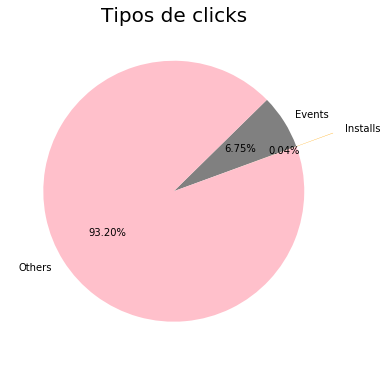

In [39]:
#Tipos de clicks
clicks_to_installs = df_clicks[df_clicks.ref_hash.isin(df_installs["ref_hash"])]
cant_clicks_to_installs = len(clicks_to_installs.index)

clicks_to_events = df_clicks[df_clicks.ref_hash.isin(df_events["ref_hash"])]
cant_clicks_to_events = len(clicks_to_events.index)

others_clicks = len(df_clicks.index) - (cant_clicks_to_installs + cant_clicks_to_events )

sizes =[cant_clicks_to_installs,cant_clicks_to_events,others_clicks] 
nombres = ['Installs', 'Events', 'Others']

plt.figure(figsize=(6, 6))
plt.title('Tipos de clicks', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.2f%%', startangle=20, colors=['orange', 'grey','pink'], explode=(0.3,0,0))
plt.show()


In [40]:
#Eventos que son instalaciones 42474 (1,7%)

df_events["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    2451949
True       42474
Name: ref_hash, dtype: int64

In [41]:
#Eventos que son subastas 1047126 (41,9%)

df_events["ref_hash"].isin(df_auctions["device_id"]).value_counts()

False    1447297
True     1047126
Name: ref_hash, dtype: int64

In [42]:
#Clicks que terminan en instalaciones 11 (0,04%)

df_clicks["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    26340
True        11
Name: ref_hash, dtype: int64

In [43]:
clicks_to_installs_by_client = clicks_to_installs.advertiser_id.value_counts().rename_axis('cliente')\
       .reset_index(name='cantidad')

In [44]:
clicks_to_installs_by_client

,cliente,cantidad
0,3,11


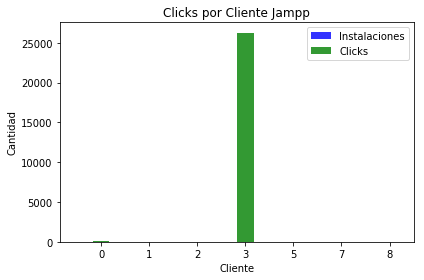

In [45]:
#VER DE MODIFICAR ESCALA PARA QUE SE NOTE MAS LAS INSTALACIONES
n_groups = 7
clicks = clicks_by_client.cantidad
instalaciones = clicks_to_installs_by_client.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Cliente')
plt.ylabel('Cantidad')
plt.title('Clicks por Cliente Jampp')
plt.xticks(index + bar_width, clicks_by_client.cliente)
plt.legend()
 
plt.tight_layout()
plt.show()

#En conclusion .. el cliente con ID 3 es el que tiene la mayor cantidad de clicks. 
#Y sólo hay instalaciones de este cliente (a partir de las subastas).
# ver si hay otro grafico para mostrar mejor esta diferencia

   hora  cantidad
0    17       233
    hora  cantidad
23     6        18
                 cant
date       hour      
2019-03-05 23      27
2019-03-06 21      27
           23      27
2019-03-07 17      35
2019-03-08 24      33
2019-03-09 17      28
2019-03-10 14      29
2019-03-11 22      34
2019-03-12 13      35
           23      35
2019-03-13 23      30


c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


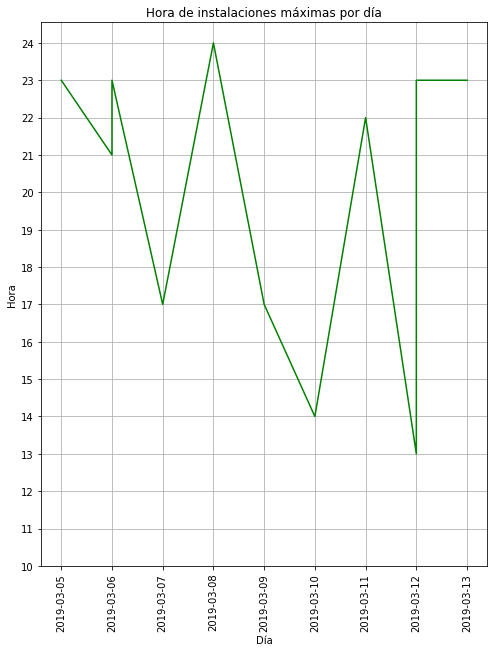

In [46]:
#Creamos una columna con el campo de fecha (sin hora)
df_installs['date'] = df_installs.created.dt.date

max_install_hour = df_installs_por_hora[df_installs_por_hora.cantidad == df_installs_por_hora.cantidad.max()]
min_install_hour = df_installs_por_hora[df_installs_por_hora.cantidad == df_installs_por_hora.cantidad.min()]

# La hora donde se produce la mayor cantidad de instalaciones es 17hs (233 installs)
print(max_install_hour)
# La hora donde se produce la menor cantidad de instalaciones es 6hs (18 installs)
print(min_install_hour)

#Agrupamos la cantidad de instalaciones por dia y hora
result = df_installs.groupby(['date','hour']).size().to_frame('cant')
idx = result.groupby(['date'])['cant'].transform(max) == result['cant']
maximos = result[idx]

print(maximos)

#Obtenemos la hora con la cantidad máxima de instalaciones por día

maximos = maximos.reset_index()
maximos.date = pd.to_datetime(maximos.date)
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(maximos.date, maximos.hour, color='g')
plt.xlabel('Día')
plt.ylabel('Hora')
plt.xticks(rotation=90)
plt.yticks([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title('Hora de instalaciones máximas por día')
ax.grid()
plt.show()

